# **<a>Lab_3**
**Name :** Karim Gamal Mahmoud Mohamed

**ID : 21kgmm**

# <a> Unsupervised Learning (Advanced Clustering)</a>



> ![](https://miro.medium.com/max/1400/1*ljCBykAJUnvaZcuPYwm4_A.png)


> [Source](https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a)

In [1]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc. 
import pandas as pd
import numpy as np 

# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

import re
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer

# data preprocessing
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string



import warnings
warnings.filterwarnings("ignore")

> For this lab we will use `Scikit-Learn’s API`, sklearn.

> Datasets, which allows us to access a famous dataset for linguistic analysis, the `20newsgroups` dataset. 

>A newsgroup is an online user discussion group, such as a forum. Sklearn allows us to access different categories of content. We will use texts that have to do with technology, religion and sport.

> More details about the dataset: [Link](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) 

> Your task is to perform `clustering` on the given dataset. 

> **Submission: submit via onq.** 


> ## <a>Task 1: 

> Read the dataset and report the basic statistics of the dataset.


> import data from sklearn.datasets and selecte pre-defined categories:

>`from sklearn.datasets import fetch_20newsgroups`

> `categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
]`

>`dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
`

> ### <a> The 20 newsgroups text dataset

>  It is a famous benchmark dataset. It contains `18000` documents that extracted from `20` topics. But we will work only on the training subset which contains `2852` articles that extracted only from `5` categories.

> ![](https://zhuzhikun15973.github.io/Figure/20_news.png)


In [2]:
# TODO code for task 1
categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism', ] 
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [3]:
print("Number of articles: " + str(len(dataset.data)))
print("Number of diffrent categories: " + str(len(dataset.target_names)))

Number of articles: 2852
Number of diffrent categories: 5


> ## <a> Basic data exploration</a>

> The basic data exploration includes the following pandas methods:

> 1. `info()` for printing a summary about the columns and data types in the dataframe.
2. `describe()` for showing statistical information about the nummerical values in the dataframe.
3. `head()` for showing the first 5 rows in the dataframe.
4. `isnull()` returns the number of missing values in the data set.


> If we want to see what all the data types are in a dataframe, use `df.dtypes` or  the `df.info()` function shows even more useful info.

In [4]:
# summary of the data including non-null counts

df = pd.DataFrame()
df['category'] = dataset.data
df['Target'] = dataset.target

# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2852 non-null   object
 1   Target    2852 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.7+ KB


> **Notes on the previous cell** : 

> After looking at the automatically assigned data types, the types of data are `int` and `object`

In [5]:
df.describe()

,Target
count,2852.000000
mean,2.088710
std,1.386227
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [6]:
df.head()

,category,Target
0,I just moved from Borland C++ 3.0 to Visual C+...,2
1,\n: \tNice cop out bill.\n\nI'm sure you're ri...,0
2,I'm attempting to transfer files from my home ...,2
3,\nThen not murdering would have no moral signi...,0
4,\nI could give much the same testimonial about...,0


In [7]:
# The function dataframe.isnull().sum() returns the number of missing values in the data set. 
df.isnull().sum()

category    0
Target      0
dtype: int64


>Through my use of `duplicated()` function with **Parameter** : `subset=None` to consider all attributes for identifying duplicates and to remove those duplicates have been used `drop_duplicates()` function.

In [8]:
# use the DataFrame.duplicated() method to return a series of boolean values
df.duplicated(subset=None)

0       False
1       False
2       False
3       False
4       False
        ...  
2847    False
2848    False
2849    False
2850    False
2851    False
Length: 2852, dtype: bool

> **Notes on the previous cell** : 

> Because of the large amount of data, we cannot determine whether there is duplicates or not, so we need to use `unique()` or `sum()`

In [9]:
df.duplicated().unique() #returns a list of unique values

array([False,  True])

> The virtualization for the `Target` column

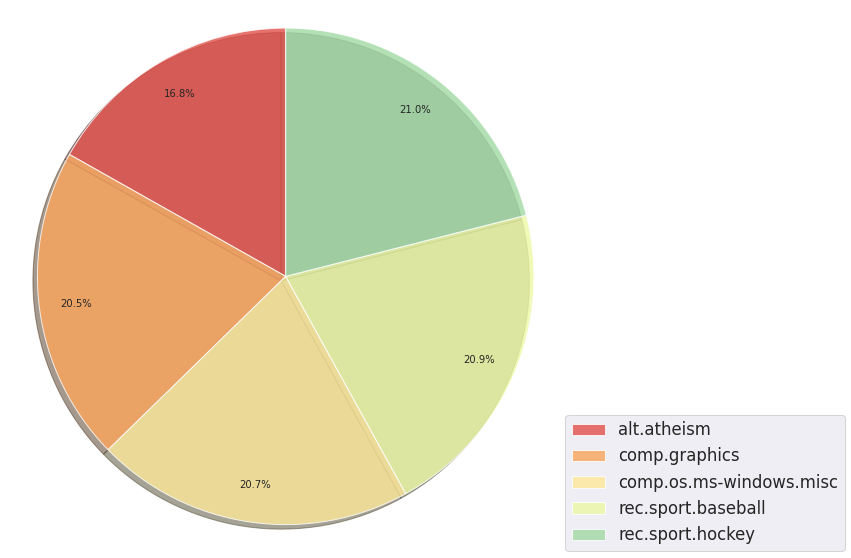

In [10]:
# item category visualization
figure = plt.figure(figsize=(10, 10))

targets, sizes = np.unique(dataset.target, return_counts=True)
target_names = [dataset.target_names[i] for i in targets]

patches, _, _ = plt.pie(sizes, autopct='%.1f%%', wedgeprops={'alpha': 0.8} ,shadow=True,radius = 1.1, startangle=90, pctdistance=0.85,)

plt.legend(patches, target_names, loc=(1, 0.0))

plt.axis('equal')
plt.show()

> ## <A> Task 2: Data cleaning.

> Use standard text preprocessing steps to preprocess raw textual content. 

> A sample preprocessing function is provided as below.

> def preprocess_text(text: str, remove_stopwords: bool) -> 

>> str:
    """This utility function sanitizes a string by:
*   removing links
*   removing special characters
*   removing numbers
*   removing stopwords
*   transforming in lowercase
*   removing excessive whitespaces
    Args:
        *   text (str): the input text you want to clean
        *   remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        *   str: the cleaned text

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

> At first We need to drop any duplicates ignoring the misleading of the machine learning model.

In [11]:
# TODO code for task 2
# dropping ALL duplicate values
df = df.drop_duplicates()

In [12]:
# To make sure everything is working fine.
df.duplicated().sum()

0

In [13]:
# nltk packages
nltk.download("stopwords")
nltk.download('punkt')
stopwords_ = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#Text cleaning
stemmer = WordNetLemmatizer()
stemmer = SnowballStemmer(language='english')

In [15]:
def text_preprocess_method(text):
    #Clean Headers
    text = re.sub(r'(From:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(Subject:[^\n]+\n)', '', text)
    text = re.sub(r"\b[A-Za-z0-9]\b", " ", text)
    text = re.sub(r'(([\sA-Za-z0-9\-]+)?[A|a]rchive-name:[^\n]+\n)', '', text)
    text = re.sub(r'(Last-modified:[^\n]+\n)', '', text)
    text = re.sub(r'(Version:[^\n]+\n)', '', text)
    #Clean More Text
    text = text.lower()
    text = text.strip()
    re_url = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    re_email = re.compile('(?:[a-z0-9!#$%&\'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&\'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])')
    text = re.sub(re_url, '', text)
    text = re.sub(re_email, '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'(\d+)', ' ', text)
    text = re.sub(r'(\s+)', ' ', text)
    # Remove repeating chars
    text = re . sub (r"!+", "! ", text )
    text = re . sub (r" \.+ ", ". ", text )
    text = re . sub (r" \?+ ", "? ", text )
    text = re . sub (r" \*+ ", "* ", text )
    text = re . sub (r"\ >+", "> ", text )
    text = re . sub (r"\ <+", "< ", text )
    # Clean shorthands
    text = re . sub ("\’s"," ", text )
    text = re . sub ("\’ve"," have ", text )
    text = re . sub ("\’re", " are ", text )
    text = re . sub ("\’ll", " will ", text )
    text = re . sub ("I’m", "I am", text )
    text = re . sub ("\’d", " would ", text )
    text = re . sub ("n’t", " not ", text )
    text = re . sub (" can ’t", " can not ", text , flags = re . IGNORECASE )
    text = re . sub ("i\.e\.", "id est ", text , flags = re . IGNORECASE )
    text = re . sub ("e\.g\.", " for example ", text , flags = re . IGNORECASE )
    text = re . sub ("e- mail ", " email ", text , flags = re . IGNORECASE )
    # Special characters
    text = re . sub ("\$"," dollar ", text )
    text = re . sub ("\&", " and ", text )
    text = re . sub ("\%", " percent ", text )
    text = text.split()
    text = [stemmer.stem(word) for word in text if not word in set(stopwords_)]
    text = ' '.join(text)
    return text

In [16]:
# the first row
df['category'][0]

'I just moved from Borland C++ 3.0 to Visual C++ today. When I tried\nto compile my C++ program, it complained a function prototype problem.\nIt turned out that the typedef WORD in MS C++ is a BYTE, not unsigned int.\n\n    Could anyone shine some light on this subject ? Why a WORD is a BYTE ?\n\n\n-Ming T. Lin\n\n'

In [17]:
%%time
#applying text_preprocess_method
df['cleaned_category'] = df['category'].apply(text_preprocess_method)

CPU times: user 18.5 s, sys: 92.3 ms, total: 18.6 s
Wall time: 26 s


In [18]:
# To make sure everything is working fine.
df['cleaned_category'][0]

'move borland visual today tri compil program complain function prototyp problem turn typedef word ms byte unsign int could anyon shine light subject word byte ming lin'

> ## <a>Task 3:<a>

> create vector representation of each document using TF-IDF encoding.

> If we don't know what is TF-IDF encoding, read this: [Link](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html) 

> ### Vectorization

> In basic terms, Vectorization is the process of converting text into numerical representation which are also called embeddings. Since, the computers are not as intelligent as us (till now atleast ;), they can't understand textual data, so to make our data understandable to a computer, we first convert it to a numerical format.

> There are various techniques for text vectorization like:-



>*   Bag of Words
*   Count Vectorizer
*   TF-IDF Vectorizer

> Here, we're gonna use the TF-IDF Vectorizer approach. So, TF-IDF is an acronym for Term Frequency - Inverse Document Frequency.


> *   TF makes sure to give high score to the word that appears frequently.
*   IDF makes sure to give low score to the word if it appears pretty frequently in documents (not a unique identifier).

> So, the amalgamation of TF * IDF is how the score is calculated for this vectorizer.



![link text](https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [19]:
# TODO code for task 3, hint, you can use TfidfVectorizer from sklearn

# source : https://mmuratarat.github.io/2020-04-03/bow_model_tf_idf
vectorizer_word = TfidfVectorizer( max_df=0.55, analyzer="word", use_idf=True, max_features=20000, min_df=5, ngram_range=(1, 2), norm="l2")
tfidf_vector= vectorizer_word.fit_transform(df["cleaned_category"])

In [20]:
#get tfidf vector for first document
first_document_vector=tfidf_vector[0]
 
#print the scores
tokens = vectorizer_word.get_feature_names()
df_2 = pd.DataFrame(first_document_vector.T.todense(), index=tokens, columns=["tf-idf"])
df_2.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
byte,0.417340
word,0.307739
prototyp,0.267766
int,0.252558
shine,0.248606
...,...
get copi,0.000000
get better,0.000000
get back,0.000000
get away,0.000000


> ## <a>Task 4:<a>

> Apply `Kmeans` and `Kmeans++` on the above extracted document vectors. 

> Brifely describe how would you select the value of `K`. 


> You can use : [link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means) 

> # <center> <A> K-means vs K-means++ </a>

> `K-means` is one of the most straightforward algorithm which is used to solve unsupervised clustering problems.

> In these clustering problems we are given a dataset of instances and the dataset is defined with the help of some attributes. Each instance in the dataset has some relevant values corresponding to those attributes. Our goal is to categorize those instances into different clusters with the help of k-mean algorithm.

> **Cost Function of K-Means:**

> ![](https://miro.medium.com/max/862/1*efmspaoE4wD4T9euwgqePA.png)

> **Algorithm:**

> 1. The first step involves the random initialization of k data points which are called means.

> 2. In this step we cluster each data point to it's nearest mean and after that we update the mean of the current clusters. mean: is the average of a group of values.

> 3. This cycle continues for a given number of repetitions and after that we have our final clusters.

> #### **Drawback of `K-means` Algorithm :**

> The main drawback of `k-means` algorithm is that it is very much dependent on the initialization of the centroids or the mean points.

> In this way, if a centroid is introduced to be a "far away" point, it may very well wind up without any data point related with it and simultaneously more than one cluster may wind up connected with a solo centroid. Likewise, more than one centroids may be introduced into a similar group bringing about poor clustering.


> #### <a>How `K-means++` Algorithm overcomes the drawback of `k-mean` Algorithm ?</a>

> `K-means++` is the algorithm which is used to overcome the drawback posed by the k-means algorithm.

> This algorithm guarantees a more intelligent introduction of the centroids and improves the nature of the clustering. Leaving the initialization of the mean points the `k-means++` algorithm is more or less the same as the conventional `k-means` algorithm.

> **Algorithm:**

> 1. In the starting we have to select a random first centroid point from the given dataset.

> 2. Now for every instance say 'i' in the dataset calculate the distance say 'x' from 'i' to the closest, previously chosen centroid.

> 3. Select the following centroid from the dataset with the end goal that the likelihood of picking a point as centroid is corresponding to the distance from the closest, recently picked centroid.

> 4. Last 2 steps are repeated until you get k mean points.

> ### <a> Contrast between K-means and K-means++:

> #### **K-means++**

> ![](https://iq.opengenus.org/content/images/2020/05/km--1.png)

> #### **K-means**

> ![](https://iq.opengenus.org/content/images/2020/05/km1.png)


[Source](https://iq.opengenus.org/k-means-vs-k-means-p/#:~:text=the%20selection%20of%20the%20centroids,dependent%20on%20initialization%20of%20centroid)

> ### <a> How to pick the best value of K?

> The best value of K can be computed using the Elbow method. The cost function of `K-Means` & `K-Means++` techniques is to minimize intercluster distance and maximize intracluster distance. This can be achieved by minimizing the loss function.

> ![](https://miro.medium.com/max/662/1*wJlGAXk0X75cuJmAE6b3xg.png)

> ### <a> K-means

> To determine the right ‘K’, draw a plot between loss vs k.

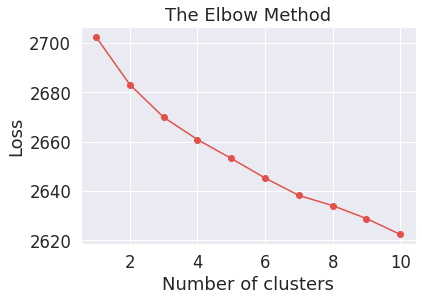

In [21]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization. 
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', )
    kmeans.fit(tfidf_vector)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.show()

> **Notes on the previous cell** : 

> As we can see, it is very difficult to determine the number `K`, because the `K-mean` is often not suitable for categorical data. But as we know from our data, we have `5` categories,so `k = 5`

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter = 300, n_init = 10, random_state = 0, tol=1e-0)
kmeans.fit(tfidf_vector)

KMeans(init='random', n_clusters=5, random_state=0, tol=1.0)

In [23]:
# no. of iterations run.
print('Number of iterations run : ', kmeans.n_iter_)
# the predicted labels
print('the predicted labels : ',kmeans.labels_)

Number of iterations run :  13
the predicted labels :  [0 0 4 ... 1 0 2]


> ### <a> K-Means++

In [24]:
kmeans_pp = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, tol=1e-0)
kmeans_pp.fit(tfidf_vector)

KMeans(n_clusters=5, random_state=0, tol=1.0)

In [25]:
# no. of iterations run.
print('Number of iterations run : ', kmeans_pp.n_iter_)
# the predicted labels
print('the predicted labels : ',kmeans_pp.labels_)

Number of iterations run :  11
the predicted labels :  [2 2 4 ... 1 2 2]


> This Package provides BeautifulTable class for easily printing tabular data in a visually appealing format to a terminal.

> ## <a> Task 5: 

> perform tricks on the above two approaches by considering the high-dimensional nature of the dataset, you can consider PCA `(from sklearn.decomposition import PCA)`, or other methods. 

> ### <a> SVD Dimensionality Reduction for `K-means`

> Note: PCA does not support sparse input. so we will use TruncatedSVD for a possible alternative.

In [26]:
# TODO for Task 5
# Reduce the tfidf matrix to just 2 features (n_components)
svd = TruncatedSVD(n_components = 2, random_state = 0)
feature_mat = svd.fit_transform(tfidf_vector)

In [27]:
kmeans_svd = KMeans(n_clusters = 5, init = 'random', random_state = 0, tol=1e-0)
kmeans_svd.fit(tfidf_vector)

KMeans(init='random', n_clusters=5, random_state=0, tol=1.0)

In [28]:
# no. of iterations run.
print('Number of iterations run : ', kmeans_svd.n_iter_)
# the predicted labels
print('the predicted labels : ',kmeans_svd.labels_)

Number of iterations run :  13
the predicted labels :  [0 0 4 ... 1 0 2]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


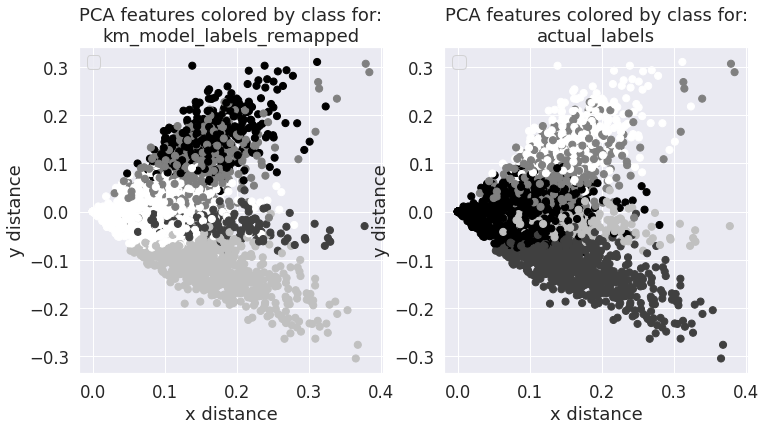

In [29]:
def scatter_plot_with_labels(i_plot, df_centers, labels, title):
  ax = plt.subplot(1, 2, i_plot)
  ax.set_title('PCA features colored by class for:\n' + title)
  ax.set_xlabel('x distance')
  ax.set_ylabel('y distance')
  plt.scatter(feature_mat[:, 0], feature_mat[:, 1], c=labels, s=50, cmap='gray')

  colors = ['red', 'green', 'blue', 'yellow']
  for i,color in enumerate(kmeans_svd.cluster_centers_.tolist()):
    plt.plot(kmeans_svd.cluster_centers_[1][i], kmeans_svd.cluster_centers_[2][i])

  plt.legend()

# di_actual_to_kmeans = {0:4, 1:3, 2:2, 3:1, 4:0}  # no color remapping
di_actual_to_kmeans = {0:4, 1:3, 2:2, 3:1, 4:0}
km_model_labels_remapped = [di_actual_to_kmeans[x] for x in kmeans_svd.labels_]

plt.figure(figsize=(12,6))
scatter_plot_with_labels(1, kmeans_svd.cluster_centers_, km_model_labels_remapped, "km_model_labels_remapped")
scatter_plot_with_labels(2, kmeans_svd.cluster_centers_, kmeans_svd.labels_, "actual_labels")
plt.show()

> ### <a> SVD Dimensionality Reduction for `K-means++`

In [30]:
kmeans_pp_svd = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0, tol=1e-0)
kmeans_pp_svd.fit(tfidf_vector)

KMeans(n_clusters=5, random_state=0, tol=1.0)

In [31]:
# no. of iterations run.
print('Number of iterations run : ', kmeans_pp_svd.n_iter_)
# the predicted labels
print('the predicted labels : ',kmeans_pp_svd.labels_)

Number of iterations run :  11
the predicted labels :  [2 2 4 ... 1 2 2]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


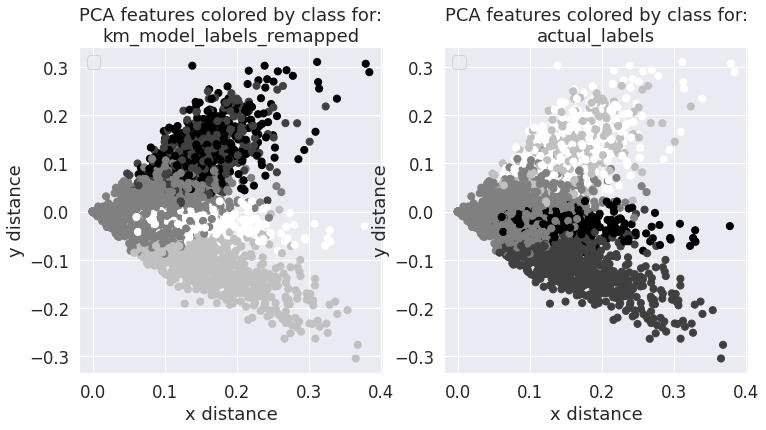

In [32]:
# di_actual_to_kmeans = {0:4, 1:3, 2:2, 3:1, 4:0}  # no color remapping
di_actual_to_kmeans = {0:4, 1:3, 2:2, 3:1, 4:0}
km_model_labels_remapped = [di_actual_to_kmeans[x] for x in kmeans_pp_svd.labels_]

plt.figure(figsize=(12,6))
scatter_plot_with_labels(1, kmeans_pp_svd.cluster_centers_, km_model_labels_remapped, "km_model_labels_remapped")
scatter_plot_with_labels(2, kmeans_pp_svd.cluster_centers_, kmeans_pp_svd.labels_, "actual_labels")
plt.show()

> ## <a> Task 6:</a>

> compare the performance of the above four approaches on the given dataset using mutual information based scores: [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html )

> ### <a>  `k-means` Clustering Performance Benchmarking

> let's create a table that contains the benchmarks for the four kmeans models.

In [33]:
# TODO for Task 6
# install the package
!pip install beautifultable


Shorthand | 	full name
--- | ---
**`homo`** | **homogeneity score**
**`compl`** | **completeness score**
**`v-meas`** | **V measure**
**`ARI`** | **adjusted Rand index**
**`AMI`** | **adjusted mutual information**
**`silhouette`** | **silhouette coefficient**


In [34]:
from beautifultable import BeautifulTable

# source : https://pypi.org/project/beautifultable/
# source : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
def bench_k_means():
  table = BeautifulTable()
  table.column_headers = ["", "homo"  ,  "compl" ,  "v-meas" , "ARI" ,    "AMI"   ,  "silhouette"]

  for k,i in zip(['k-means','k-means++','k-means_svd' , 'k-means++_svd'],[kmeans, kmeans_pp, kmeans_svd, kmeans_pp_svd]):
    table.append_row([k,  metrics.homogeneity_score(df['Target'], i.labels_),
                                metrics.completeness_score(df['Target'], i.labels_),
                                metrics.v_measure_score(df['Target'], i.labels_),
                                metrics.adjusted_rand_score(df['Target'], i.labels_),
                                metrics.mutual_info_score(df['Target'], i.labels_),
                                metrics.silhouette_score(tfidf_vector, i.labels_, sample_size=1000),
                                ])
  print(table)

bench_k_means()

+---------------+-------+-------+--------+-------+-------+------------+
|               | homo  | compl | v-meas |  ARI  |  AMI  | silhouette |
+---------------+-------+-------+--------+-------+-------+------------+
|    k-means    | 0.382 | 0.41  | 0.395  | 0.246 | 0.613 |   0.007    |
+---------------+-------+-------+--------+-------+-------+------------+
|   k-means++   | 0.394 | 0.426 | 0.409  | 0.238 | 0.633 |   0.007    |
+---------------+-------+-------+--------+-------+-------+------------+
|  k-means_svd  | 0.382 | 0.41  | 0.395  | 0.246 | 0.613 |   0.006    |
+---------------+-------+-------+--------+-------+-------+------------+
| k-means++_svd | 0.394 | 0.426 | 0.409  | 0.238 | 0.633 |   0.007    |
+---------------+-------+-------+--------+-------+-------+------------+


> There are no universal thresholds for `homo` and `inertia` due to the fact that there are different datasets. The amount of centroids should be chosen empirically, judging from the structure of data and the amount of clusters these inputs should have.

> `compl` is the completeness metrics that reaches its upper bound (1.0) if all inputs of a given class are assigned to the same cluster. Given that its interval is [0.0, 1.0], you may interpret it as a proportion. `homo` is the homogeneity metrics which interval is equal to `compl`. It reaches 1.0 if each cluster contains inputs of a single class. `v_meas` is simply a harmonic mean of those two metrics.

> ## <a> Mutual Information Score only.

In [35]:
def k_means_mutual_info_score():
  table = BeautifulTable()
  table.column_headers = ["", "AMI" ]

  for k,i in zip(['k-means','k-means++','k-means_svd' , 'k-means++_svd'],[kmeans, kmeans_pp, kmeans_svd, kmeans_pp_svd]):
    table.append_row([k, metrics.mutual_info_score(df['Target'], i.labels_),])
  print(table)

k_means_mutual_info_score()

+---------------+-------+
|               |  AMI  |
+---------------+-------+
|    k-means    | 0.613 |
+---------------+-------+
|   k-means++   | 0.633 |
+---------------+-------+
|  k-means_svd  | 0.613 |
+---------------+-------+
| k-means++_svd | 0.633 |
+---------------+-------+


# **<a>Resources.</a>**

There are a lot of resources, but these are among the most important sources that helped me and I learned from them.

**Note:** The code sources were mentioned to each cell separately.



> [20 Newsgroups on kaggle](https://www.kaggle.com/datasets/crawford/20-newsgroups)

> [the selection of the centroids](https://iq.opengenus.org/k-means-vs-k-means-p/#:~:text=the%20selection%20of%20the%20centroids,dependent%20on%20initialization%20of%20centroid)


> [k-medoids-clustering](https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca)

> [plot_kmeans_digits](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

> [plot_document_clustering](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html)

> [sklearn.cluster.k_means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means)


> [bow_model_tf_idf](https://mmuratarat.github.io/2020-04-03/bow_model_tf_idf)






